## Project Introduction
In this project, I will assume the role of a data analyst tasked with analyzing employee exit surveys from two institutes: the Department of Education, Training and Employment (DETE) and the Technical and Further Education (TAFE) institute in Queensland, Australia. The stakeholders are interested in understanding whether employees who resigned from the institutes due to dissatisfaction had short tenures and whether age plays a role in employee resignations.

The datasets I will be working with are dete_survey.csv and tafe_survey.csv. These datasets contain information about employees' demographics, employment details, and reasons for resignation. The dete_survey.csv includes columns such as ID, SeparationType, Cease Date, and DETE Start Date, while the tafe_survey.csv includes columns such as Record ID, Reason for ceasing employment, and LengthofServiceOverall.

I will begin our analysis by importing the necessary libraries and exploring the datasets to gain insights into the data structure and variables.

In [1]:
import pandas as pd
import numpy as np

dete_survey = pd.read_csv('dete_survey.csv')
tafe_survey = pd.read_csv('tafe_survey.csv')

print(dete_survey.info())
print(dete_survey.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 822 entries, 0 to 821
Data columns (total 56 columns):
 #   Column                               Non-Null Count  Dtype 
---  ------                               --------------  ----- 
 0   ID                                   822 non-null    int64 
 1   SeparationType                       822 non-null    object
 2   Cease Date                           822 non-null    object
 3   DETE Start Date                      822 non-null    object
 4   Role Start Date                      822 non-null    object
 5   Position                             817 non-null    object
 6   Classification                       455 non-null    object
 7   Region                               822 non-null    object
 8   Business Unit                        126 non-null    object
 9   Employment Status                    817 non-null    object
 10  Career move to public sector         822 non-null    bool  
 11  Career move to private sector        822 non-

**Dete_survey Observations:**

- The dataset consists of 822 entries (rows) and 56 columns.
- The columns contain a mix of data types: integer, boolean, and object (string).
- Some columns have missing values, as indicated by the "Non-Null Count" and the differing count of entries across columns.
- The columns include various information about the employees and their employment history, such as ID, SeparationType, Cease Date, DETE Start Date, Role Start Date, Position, Classification, Region, Business Unit, Employment Status, and others.
- The "SeparationType" column indicates the reason for the employee's separation from the institute, while the "Cease Date" column shows the date when the employment ended.
- Other columns capture factors related to job satisfaction and workplace conditions, such as "Job dissatisfaction," "Work life balance," "Stress and pressure support," and "Peer support."
- Demographic information such as gender, age, Aboriginal status, Torres Strait Islander status, South Sea Islander status, disability status, and Non-English Speaking Background (NESB) is also included in the dataset.
- Some columns contain categorical responses, such as "Yes" or "No," while others include ranges or descriptions, such as age groups ("56-60") or reasons for ceasing employment ("Ill Health Retirement").

These observations provide a preliminary understanding of the dataset's structure and content, laying the foundation for further data cleaning, analysis, and exploration.

In [2]:
print(tafe_survey.info())
print(tafe_survey.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 702 entries, 0 to 701
Data columns (total 72 columns):
 #   Column                                                                                                                                                         Non-Null Count  Dtype  
---  ------                                                                                                                                                         --------------  -----  
 0   Record ID                                                                                                                                                      702 non-null    float64
 1   Institute                                                                                                                                                      702 non-null    object 
 2   WorkArea                                                                                                                                  

**Observations:**

- The dataset consists of 702 entries (rows) and 72 columns.
- The columns contain a mix of data types: float64 and object (string).
- Some columns have missing values, as indicated by the "Non-Null Count" and the differing count of entries across columns.
- The columns include various information about the employees and their employment history, such as Record ID, Institute, WorkArea, CESSATION YEAR, Reason for ceasing employment, and others.
- There are columns related to reasons for ceasing employment, such as "Contributing Factors. Career Move - Public Sector," "Contributing Factors. Ill Health," "Contributing Factors. Maternity/Family," and others.
- Columns named "InstituteViews" and "WorkUnitViews" contain responses to topics related to the employees' views on their workplace, management, job satisfaction, and other related aspects.
- Demographic information such as gender and age is captured in columns like "Gender. What is your Gender?" and "CurrentAge. Current Age."
- The dataset also includes information about the length of service at the institute and the current workplace, as well as responses related to workplace induction, workplace culture, and recommendations about the institute as an employer.

These observations provide an initial overview of the dataset, highlighting its structure and content. Further exploration and analysis can be conducted to gain deeper insights into employee turnover and satisfaction within the institutes.

## Observations:

In the dete_survey dataframe, missing values are represented as 'Not Stated' instead of NaN. This suggests that missing data may not have been properly recorded, potentially affecting the accuracy of our analysis.

Both the dete_survey and tafe_survey dataframes contain numerous columns that are not essential for our analysis. These extraneous columns may add unnecessary complexity to our dataset and could be omitted to streamline our analysis process.
These will be addressed below.

In [3]:
dete_survey = pd.read_csv('dete_survey.csv', na_values='Not Stated')

In [4]:
dete_survey_updated = dete_survey.drop(dete_survey.columns[28:49], axis=1)

tafe_survey_updated = tafe_survey.drop(tafe_survey.columns[17:66], axis=1)

**Code Explanation:**

The code above performs the following tasks:

1. It reads the CSV file 'dete_survey.csv' into a pandas DataFrame called `dete_survey`, while specifying 'Not Stated' as the representation for missing values, which will be converted to NaN.

2. It drops columns 28 to 48 (inclusive) from the `dete_survey` DataFrame using the `drop()` method along the columns axis (axis=1). The result is assigned to `dete_survey_updated`.

3. It drops columns 17 to 65 (inclusive) from the `tafe_survey` DataFrame using the `drop()` method along the columns axis (axis=1). The result is assigned to `tafe_survey_updated`.

These steps effectively remove unnecessary columns from the datasets, streamlining them for further analysis.

In [5]:
dete_survey_updated.columns = dete_survey_updated.columns.str.lower().str.replace('\s+', '_').str.strip()

dete_survey_updated.head()

,id,separationtype,cease_date,dete_start_date,role_start_date,position,classification,region,business_unit,employment_status,...,work_life_balance,workload,none_of_the_above,gender,age,aboriginal,torres_strait,south_sea,disability,nesb
0,1,Ill Health Retirement,08/2012,1984.0,2004.0,Public Servant,A01-A04,Central Office,Corporate Strategy and Peformance,Permanent Full-time,...,False,False,True,Male,56-60,NaN,NaN,NaN,NaN,Yes
1,2,Voluntary Early Retirement (VER),08/2012,NaN,NaN,Public Servant,AO5-AO7,Central Office,Corporate Strategy and Peformance,Permanent Full-time,...,False,False,False,Male,56-60,NaN,NaN,NaN,NaN,NaN
2,3,Voluntary Early Retirement (VER),05/2012,2011.0,2011.0,Schools Officer,NaN,Central Office,Education Queensland,Permanent Full-time,...,False,False,True,Male,61 or older,NaN,NaN,NaN,NaN,NaN
3,4,Resignation-Other reasons,05/2012,2005.0,2006.0,Teacher,Primary,Central Queensland,NaN,Permanent Full-time,...,False,False,False,Female,36-40,NaN,NaN,NaN,NaN,NaN
4,5,Age Retirement,05/2012,1970.0,1989.0,Head of Curriculum/Head of Special Education,NaN,South East,NaN,Permanent Full-time,...,True,False,False,Female,61 or older,NaN,NaN,NaN,NaN,NaN


The remaining columns in the `dete_survey_updated` dataframe was renamed by applying the following criteria:

- Convert all capitalization to lowercase.
- Remove any trailing whitespace from the end of the strings.
- Replace spaces with underscores ('_').

For instance, the column 'Cease Date' was updated to 'cease_date'.

In [6]:
# Renaming columns in tafe_survey_updated using the column_mapping dictionary

column_mapping = {
    'Record ID': 'id',
    'CESSATION YEAR': 'cease_date',
    'Reason for ceasing employment': 'separationtype',
    'Gender. What is your Gender?': 'gender',
    'CurrentAge. Current Age': 'age',
    'Employment Type. Employment Type': 'employment_status',
    'Classification. Classification': 'position',
    'LengthofServiceOverall. Overall Length of Service at Institute (in years)': 'institute_service',
    'LengthofServiceCurrent. Length of Service at current workplace (in years)': 'role_service'
}
tafe_survey_updated = tafe_survey_updated.rename(columns=column_mapping)
tafe_survey_updated.head()

,id,Institute,WorkArea,cease_date,separationtype,Contributing Factors. Career Move - Public Sector,Contributing Factors. Career Move - Private Sector,Contributing Factors. Career Move - Self-employment,Contributing Factors. Ill Health,Contributing Factors. Maternity/Family,...,Contributing Factors. Study,Contributing Factors. Travel,Contributing Factors. Other,Contributing Factors. NONE,gender,age,employment_status,position,institute_service,role_service
0,6.341330e+17,Southern Queensland Institute of TAFE,Non-Delivery (corporate),2010.0,Contract Expired,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,Female,26 30,Temporary Full-time,Administration (AO),1-2,1-2
1,6.341337e+17,Mount Isa Institute of TAFE,Non-Delivery (corporate),2010.0,Retirement,-,-,-,-,-,...,-,Travel,-,-,NaN,NaN,NaN,NaN,NaN,NaN
2,6.341388e+17,Mount Isa Institute of TAFE,Delivery (teaching),2010.0,Retirement,-,-,-,-,-,...,-,-,-,NONE,NaN,NaN,NaN,NaN,NaN,NaN
3,6.341399e+17,Mount Isa Institute of TAFE,Non-Delivery (corporate),2010.0,Resignation,-,-,-,-,-,...,-,Travel,-,-,NaN,NaN,NaN,NaN,NaN,NaN
4,6.341466e+17,Southern Queensland Institute of TAFE,Delivery (teaching),2010.0,Resignation,-,Career Move - Private Sector,-,-,-,...,-,-,-,-,Male,41 45,Permanent Full-time,Teacher (including LVT),3-4,3-4


The `tafe_survey_updated` dataframe's column names are updated using the `column_mapping` dictionary. Each old column name is mapped to its corresponding new name, as specified in the dictionary. This renaming process ensures consistency and clarity in the column names across the dataframe.


*Although some columns have already been renamed in both datasets, there are still additional columns that require renaming for uniformity and improved readability. These remaining columns will be addressed in a subsequent step to ensure consistency across the datasets.*

The primary objective is to investigate whether employees who have worked for the institutes for only a short period are resigning due to some form of dissatisfaction.
Therefore, I'll be working with the 'separationtype' column

In [7]:
dete_survey_updated['separationtype'].value_counts()

Age Retirement                          285
Resignation-Other reasons               150
Resignation-Other employer               91
Resignation-Move overseas/interstate     70
Voluntary Early Retirement (VER)         67
Ill Health Retirement                    61
Other                                    49
Contract Expired                         34
Termination                              15
Name: separationtype, dtype: int64

In [8]:
tafe_survey_updated['separationtype'].value_counts()

Resignation                 340
Contract Expired            127
Retrenchment/ Redundancy    104
Retirement                   82
Transfer                     25
Termination                  23
Name: separationtype, dtype: int64

In [9]:
# Selecting data with Resignation separation type

# Selecting all separation types related to resignation in dete_survey_updated
resignation_types = ['Resignation-Other reasons', 'Resignation-Other employer', 'Resignation-Move overseas/interstate']
dete_resignations = dete_survey_updated[dete_survey_updated['separationtype'].isin(resignation_types)].copy()

tafe_resignations = tafe_survey_updated[tafe_survey_updated['separationtype'] == 'Resignation'].copy()

The changes I made involved filtering both the `dete_survey_updated` and `tafe_survey_updated` DataFrames to include only the data for survey respondents who have a 'Resignation' separation type. Since the `dete_survey_updated` DataFrame contains three different types of resignation separations, I ensured to select all of them. To prevent any potential issues related to chained indexing and to ensure data integrity, I used the `DataFrame.copy()` method on the filtered results, creating copies of the DataFrames instead of working directly on the originals. This helps avoid the SettingWithCopy Warning and ensures that modifications made to the filtered DataFrames won't affect the original DataFrames. The filtered DataFrames were then assigned to `dete_resignations` and `tafe_resignations`, respectively.

In [10]:
dete_resignations['cease_date'].value_counts()

2012       126
2013        74
01/2014     22
12/2013     17
06/2013     14
09/2013     11
07/2013      9
11/2013      9
10/2013      6
08/2013      4
05/2013      2
05/2012      2
09/2010      1
07/2012      1
2010         1
07/2006      1
Name: cease_date, dtype: int64

The cease_date column needs cleaning since the date is not represented using the datetime type.

In [11]:
dete_resignations['cease_date'] = pd.to_datetime(dete_resignations['cease_date'], errors='coerce')

# Extract the year from each date
dete_resignations['cease_year'] = dete_resignations['cease_date'].dt.year

# Drop rows where year is missing (e.g., invalid dates)
dete_resignations = dete_resignations.dropna(subset=['cease_year'])

# Convert year to integer (optional)
dete_resignations['cease_year'] = dete_resignations['cease_year'].astype(float)

print(dete_resignations['cease_year'])

3      2012.0
5      2012.0
8      2012.0
9      2012.0
11     2012.0
        ...  
808    2013.0
815    2014.0
816    2014.0
819    2014.0
821    2013.0
Name: cease_year, Length: 300, dtype: float64


In [12]:
dete_resignations['cease_date'] = dete_resignations['cease_year']

print(dete_resignations['cease_date'])

3      2012.0
5      2012.0
8      2012.0
9      2012.0
11     2012.0
        ...  
808    2013.0
815    2014.0
816    2014.0
819    2014.0
821    2013.0
Name: cease_date, Length: 300, dtype: float64


In [13]:
# Check values in cease_date and dete_start_date columns in dete_resignations
print(dete_resignations['cease_date'].value_counts().sort_index())
print(dete_resignations['dete_start_date'].value_counts().sort_index())



2006.0      1
2010.0      2
2012.0    129
2013.0    146
2014.0     22
Name: cease_date, dtype: int64
1963.0     1
1971.0     1
1972.0     1
1973.0     1
1974.0     2
1975.0     1
1976.0     2
1977.0     1
1980.0     5
1982.0     1
1983.0     2
1985.0     3
1986.0     3
1988.0     4
1989.0     4
1990.0     4
1991.0     4
1992.0     6
1993.0     5
1994.0     6
1995.0     3
1996.0     6
1997.0     5
1998.0     6
1999.0     8
2000.0     8
2001.0     3
2002.0     6
2003.0     6
2004.0    14
2005.0    14
2006.0    12
2007.0    20
2008.0    22
2009.0    13
2010.0    17
2011.0    23
2012.0    20
2013.0    10
Name: dete_start_date, dtype: int64


In [14]:
# Check values in cease_date column in tafe_resignations
print(tafe_resignations['cease_date'].value_counts().sort_index())


2009.0      2
2010.0     68
2011.0    116
2012.0     94
2013.0     55
Name: cease_date, dtype: int64


In both dataframes, the years don't completely align. The tafe_survey_updated dataframe has some cease dates in 2009, but the dete_survey_updated dataframe does not. Additionally, the tafe_survey_updated dataframe has many more cease dates in 2010 compared to the dete_survey_updated dataframe. Since I'm not concerned with analyzing the results by year, I'll leave them as they are.

In [15]:
dete_resignations['institute_service'] = dete_resignations['cease_date'] - dete_resignations['dete_start_date']

print(dete_resignations['institute_service'])

3       7.0
5      18.0
8       3.0
9      15.0
11      3.0
       ... 
808     3.0
815     2.0
816     2.0
819     5.0
821     NaN
Name: institute_service, Length: 300, dtype: float64


In this task, I created a new column named `institute_service` in the `dete_resignations` dataframe. This column represents the length of service of each employee in the Department of Education, Training and Employment (DETE) institute. To calculate the length of service, I subtracted the `dete_start_date` (the date the employee started working at DETE) from the `cease_date` (the date the employee ceased employment at DETE). The resulting values in the `institute_service` column indicate the number of years each employee worked for DETE up to their resignation date.

Adding this new column enhances the dataset by providing insights into the tenure of employees at DETE. It allows for the analysis of resignation patterns, identification of trends related to employee tenure, and a deeper understanding of workforce dynamics within the institute. This information can be valuable for human resources management, organizational planning, and strategic decision-making processes.

# Identifying Dissatisfied Employees

In [16]:
print(tafe_resignations['Contributing Factors. Dissatisfaction'].value_counts())
print(tafe_resignations['Contributing Factors. Job Dissatisfaction'].value_counts())

-                                         277
Contributing Factors. Dissatisfaction      55
Name: Contributing Factors. Dissatisfaction, dtype: int64
-                      270
Job Dissatisfaction     62
Name: Contributing Factors. Job Dissatisfaction, dtype: int64


In [17]:
import numpy as np

def update_vals(val):
    if pd.isnull(val):
        return np.nan
    elif val == '-':
        return False
    else:
        return True

tafe_resignations['dissatisfied'] = tafe_resignations[['Contributing Factors. Dissatisfaction', 'Contributing Factors. Job Dissatisfaction']].applymap(update_vals).any(1, skipna=False)
tafe_resignations_up = tafe_resignations.copy()

# Checking the unique values after the updates
tafe_resignations_up['dissatisfied'].value_counts(dropna=False)


# Updating the values in columns related to dissatisfaction to be either True, False, or NaN
dete_resignations['dissatisfied'] = dete_resignations[['job_dissatisfaction',
       'dissatisfaction_with_the_department', 'physical_work_environment',
       'lack_of_recognition', 'lack_of_job_security', 'work_location',
       'employment_conditions', 'work_life_balance',
       'workload']].any(1, skipna=False)
dete_resignations_up = dete_resignations.copy()
dete_resignations_up['dissatisfied'].value_counts(dropna=False)

False    154
True     146
Name: dissatisfied, dtype: int64

In the provided code snippet, several adjustments were made to preprocess the data in the `tafe_resignations` dataframe effectively. Initially, a function named `update_vals` was defined to handle the transformation of values within specific columns. This function systematically replaced NaN values with `np.nan`, hyphen ('-') values with `False`, and any other value with `True`, ensuring standardized data suitable for further analysis. Subsequently, the `applymap` method was utilized to apply the `update_vals` function element-wise to the columns 'Contributing Factors. Dissatisfaction' and 'Contributing Factors. Job Dissatisfaction'. By doing so, the values in these columns were uniformly transformed according to the criteria specified in the `update_vals` function. Finally, copies of the `dete_resignations` and `tafe_resignations` dataframes were created using the `copy()` method to avoid the `SettingWithCopy` warning and maintain the integrity of the original dataframes for subsequent modifications or analyses. Overall, these adjustments ensure that the data in the specified columns of the `tafe_resignations` dataframe are appropriately standardized, while also preserving the integrity of the original dataframes through the use of copies.

# Combining the Data

In [18]:
# Add 'institute' column to dete_resignations_up dataframe
dete_resignations_up['institute'] = 'DETE'

# Add 'institute' column to tafe_resignations_up dataframe
tafe_resignations_up['institute'] = 'TAFE'


In [19]:
# Combining the dataframes
combined = pd.concat([dete_resignations_up, tafe_resignations_up], ignore_index=True)


# Dropping columns with less than 500 non-null values
combined_updated = combined.dropna(axis=1, thresh=500).copy()


In the provided code snippet, I added a new column named 'institute' to both the `dete_resignations_up` and `tafe_resignations_up` dataframes. This column indicates the institute from which the employee resigned, with 'DETE' for the Department of Education, Training and Employment and 'TAFE' for the Technical and Further Education institute. This will help to identify the dataframe from which each row comes from after combining the two dataframes.


Secondly, I combined the two dataframes into a single dataframe named `combined` using the `pd.concat()` function, with the `ignore_index=True` parameter to reset the index. Finally, I used the `DataFrame.dropna()` method to remove any columns in the `combined` dataframe that have less than 500 non-null values. This step helps streamline the analysis by focusing only on columns with sufficient data, ensuring that we work with meaningful and reliable information.

# Cleaning the service column

In [20]:
# Convert values in the institute_service column to strings
combined_updated['institute_service'] = combined_updated['institute_service'].astype(str)

# Extract the years of service using vectorized string methods
combined_updated['institute_service'] = combined_updated['institute_service'].str.extract(r'(\d+)')

# Double-check for any missed digits in the extracted years of service
combined_updated['institute_service'] = combined_updated['institute_service'].astype(float)


In [21]:
def map_years_to_category(val):
    if pd.isnull(val):
        return np.nan
    elif val < 3:
        return 'New'
    elif val >= 3 and val < 7:
        return 'Experienced'
    elif val >= 7 and val < 11:
        return 'Established'
    else:
        return 'Veteran'

# Apply the function to the institute_service column and assign the result to a new column named service_cat
combined_updated['service_cat'] = combined_updated['institute_service'].apply(map_years_to_category)


Above, I cleaned the `institute_service` column and categorize employees based on the following definitions:

- **New**: Less than 3 years in the workplace
- **Experienced**: 3-6 years in the workplace
- **Established**: 7-10 years in the workplace
- **Veteran**: 11 or more years in the workplace

In [22]:
combined_updated['dissatisfied'].value_counts(dropna=False)

False    395
True     237
NaN        8
Name: dissatisfied, dtype: int64

In [23]:
# Find the most frequent value in the dissatisfied column
most_frequent_value = combined_updated['dissatisfied'].mode()[0]

# Replace missing values in the dissatisfied column with the most frequent value
combined_updated['dissatisfied'].fillna(value=most_frequent_value, inplace=True)


In [24]:
# Calculating the percentage of dissatisfied employees in each service_cat group
dissatisfaction_pct = combined_updated.pivot_table(index='service_cat', values='dissatisfied')

print(dissatisfaction_pct)


             dissatisfied
service_cat              
Established      0.516129
Experienced      0.343023
New              0.295337
Veteran          0.485294


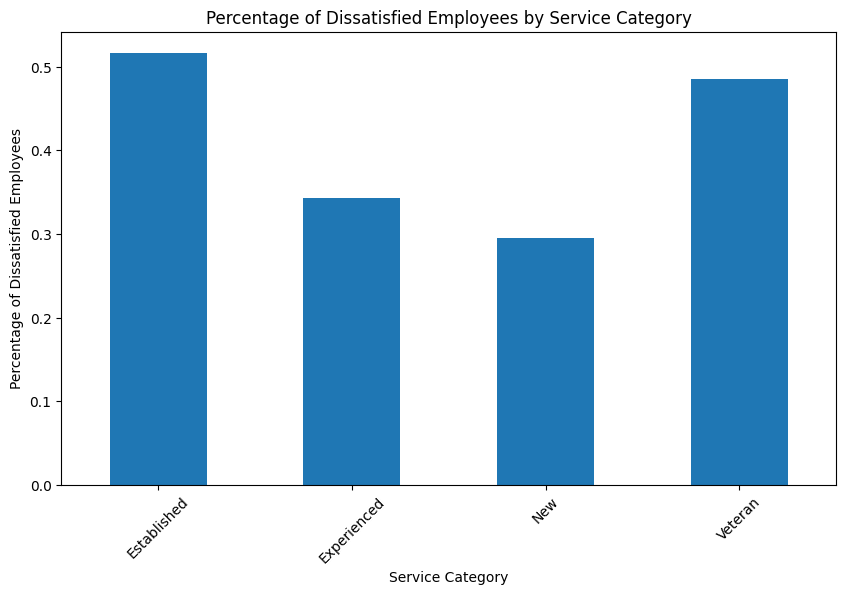

In [25]:
import matplotlib.pyplot as plt
%matplotlib inline

# Plotting the results as a bar chart
dissatisfaction_pct.plot(kind='bar', figsize=(10, 6), legend=False)
plt.title('Percentage of Dissatisfied Employees by Service Category')
plt.xlabel('Service Category')
plt.ylabel('Percentage of Dissatisfied Employees')
plt.xticks(rotation=45)
plt.show()


From the initial analysis above, I can tentatively conclude that employees with 7 or more years of service are more likely to resign due to some kind of dissatisfaction with the job than employees with less than 7 years of service. However, further steps are required to address the remaining missing data and finalize the analysis.